In [ ]:
#To convert this to a Python script, use:
#jupyter nbconvert --to python Mikado.ipynb

#To run on a SLURM scheduler or other shared computing system, you may need to load modules.
#For Savio, utilize the script Mikado.sh

#To upload this to SLURM, along with other necessary files, use
#scp Mikado.py Mikado.sh dasun@dtn.brc.berkeley.edu:/global/scratch/dasun/Transcriptome_assessment

In [66]:
#Configuration of Python script
!printf 'loading libraries\n'
import subprocess
import os
import os.path
import fnmatch
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from io import StringIO
import sys
!printf 'loaded libraries\n'

loading libraries
loaded libraries


In [1]:
#############################################################
### Fill in this information before running this section ####

#Decide if you want to run this section
run_gmap_build = False
run_gmap_align = False
run_gmap_prepare = False
run_samtools_sort = False
run_picardtools_valsam = False
run_picardtools_clean = False
run_portcullis = False
run_samtools_clean = False
run_portcullis_insilico = False

#Write a base pattern for your raw fastq file names
#This pattern should occur in all of your file names
genome_file = 'phaw_5.0.fa'
alignment_bam = 'Sall_RNA_sorted.aligned.bam'
transcriptome_list = [
    'Phaw_DAS_Trinity-GG_hisat2.fasta'
]
old_transcriptome_list = [
    'HB_Transcriptome_Trinity-GG.fasta',
    'HB_Transcriptome_Trinity.fasta',
    'ParhyaleTranscriptome.ReAnnotated.reformatted4.fasta',
    'Phaw_DAS_Trinity.fasta',
    'Trinity_S13.fasta',
    'Trinity_S19.fasta',
    'Trinity_S21.fasta',
    'Trinity_S23.fasta',
    'PhRef5and3RACE.fa',
    'Phaw.Kao.annotations.transcript.fa'
]
gff_list = [
    'Phaw_DAS_Trinity-GG_hisat2.gff'
]
old_gff_list = [
    'HB_Transcriptome_Trinity-GG.gff',
    'HB_Transcriptome_Trinity.gff',
    'ParhyaleTranscriptome.ReAnnotated.reformatted4.gff',
    'Phaw.Kao.annotations.transcript.gff',
    'Phaw_DAS_Trinity.gff',
    'Trinity_S13.gff',
    'Trinity_S19.gff',
    'Trinity_S21.gff',
    'Trinity_S23.gff'
]

#############################################################
#############################################################

genome_name = genome_file.replace('.fa', '')
genome_dir = genome_name + '_dir'

#checks if you want to trim your reads
if run_gmap_build == True:
    !gmap_build -s=none -D $genome_dir -d $genome_name $genome_file

if run_gmap_align == True:
    for transcriptome in transcriptome_list:
        output_file = transcriptome.replace('.fasta', '.gff')
        !printf 'working on '$transcriptome' and outputting to '$output_file'\n'
        !/clusterfs/vector/home/groups/software/sl-7.x86_64/modules/gmap-gsnap/2017-10-30/bin/gmap -D $genome_dir --max-intronlength-ends=300000 --format=gff3_gene --nthreads=20 -d $genome_name $transcriptome > $output_file
        
if run_gmap_prepare == True:
    for gff in gff_list:
        gff_sorted = gff.replace('.gff', '.sorted.gff')
        !printf 'igvtools sort on '$gff' and outputting to '$gff_sorted'\n'
        !igvtools sort $gff $gff_sorted
        !printf 'igvtools index on '$gff_sorted'\n'
        !igvtools index $gff_sorted

if run_samtools_sort == True:
    !samtools view -F 0x04 -b Sall_RNA_sorted.bam > Sall_RNA_sorted.aligned.bam

if run_picardtools_valsam == True:
    !java -jar /clusterfs/vector/home/groups/software/sl-7.x86_64/modules/picard/2.9.0/lib/picard.jar ValidateSamFile I=Sall_RNA_sorted.aligned.bam MODE=SUMMARY

if run_picardtools_clean == True:
    !java -jar /clusterfs/vector/home/groups/software/sl-7.x86_64/modules/picard/2.9.0/lib/picard.jar CleanSam I=Sall_RNA_sorted.aligned.bam O=Sall_RNA_sorted.cleaned.bam

if run_portcullis == True:
    cleaned_bam = 'Sall_RNA_sorted.bam'
    portcullis_out = alignment_bam.replace('.bam', '.portcullis.bed')
    now = datetime.now()
    dt_string = now.strftime("%Y-%m-%d_%H.%M.%S")
    portcullisdebug = df_string + '_portcullis_debug.txt'
    !printf 'running portcullis on '$cleaned_bam' and outputting to portcullis_out. stderr and stdout to '$portcullisdebug'/\n'
    !portcullis full --verbose -t 32 $genome_file $cleaned_bam 2>&1 > $portcullisdebug

if run_samtools_clean == True:
    !samtools view -b -F 4 Phaw_RNA_insilico_q10.bam > Phaw_RNA_insilico_q10.mapped.bam

if run_portcullis_insilico == True:
    cleaned_bam = 'Phaw_RNA_insilico_q10.mapped.bam'
    portcullis_out = alignment_bam.replace('.bam', '.portcullis.bed')
    now = datetime.now()
    dt_string = now.strftime("%Y-%m-%d_%H.%M.%S")
    portcullisdebug = dt_string + '_portcullis_insilico_debug.txt'
    !printf 'running portcullis on '$cleaned_bam' and outputting to portcullis_out. stderr and stdout to '$portcullisdebug'/\n'
    !portcullis full --force --copy --verbose -t 32 $genome_file $cleaned_bam 2>&1 | tee $portcullisdebug

working on $transcriptome and outputting to $output_filezsh:1: command not found: gmap
working on $transcriptome and outputting to $output_filezsh:1: command not found: gmap
working on $transcriptome and outputting to $output_filezsh:1: command not found: gmap
working on $transcriptome and outputting to $output_filezsh:1: command not found: gmap
working on $transcriptome and outputting to $output_filezsh:1: command not found: gmap


In [ ]:
#############################################################
### Fill in this information before running this section ####

#Decide if you want to run this section
run_hisat2_build = False
run_hisat2 = False
run_clean_hisat = False
run_portcullis_hisat2 = False
rerun_portcullis_hisat2 = False

genome_file = 'phaw_5.0.fa'
index_base = genome_file.replace('.fa', '')

#############################################################
#############################################################

#checks if you want to trim your reads
if run_hisat2_build == True:
    !hisat2-build -p 32 $genome_file $index_base

if run_hisat2 == True:
    r1 = 'S13A1_S84_R1_001_rd1_1_all_1.fq.gz_ext_all_reads.normalized_K25_C50_pctSD10000.fq'
    r2 = 'S13A1_S84_R2_001_rd1_2_all_2.fq.gz_ext_all_reads.normalized_K25_C50_pctSD10000.fq'
    Sfile = 'Phaw_RNA_hisat2.sam'
    !hisat2 -x $index_base -1 $r1 -2 $r2 -S 'Phaw_RNA_hisat2.sam' --novel-splicesite-outfile 'Phaw_RNA_hisat2_novelsplice.tsv'

if run_clean_hisat == True:
    start_sam = 'Phaw_RNA_hisat2.sam'
    cleaned_bam = start_sam.replace('.sam', '.cleaned.bam')
    !samtools view -b -F 4 $start_sam > $cleaned_bam
    
if run_portcullis_hisat2 == True:
    cleaned_bam = 'Phaw_RNA_hisat2.cleaned.bam'
    now = datetime.now()
    dt_string = now.strftime("%Y-%m-%d_%H.%M.%S")
    portcullisdebug = dt_string + '_portcullis_insilico_debug.txt'
    !printf 'running portcullis on '$cleaned_bam' and outputting to portcullis_out. stderr and stdout to '$portcullisdebug'/\n'
    !portcullis full --force --copy --verbose -t 32 $genome_file $cleaned_bam 2>&1 | tee $portcullisdebug

if rerun_portcullis_hisat2 == True:
    !cat portcullis_out/2-junc/portcullis_all.junctions.tab |awk '!(($11=="?" && $14=="NA") || ($11=="?" && $13=="NA"))' > portcullis_out/2-junc/portcullis_all.junctions.cleaned.tab
    !portcullis filter --verbose portcullis_out/1-prep portcullis_out/2-junc/portcullis_all.junctions.cleaned.tab

In [2]:
#############################################################
### Fill in this information before running this section ####

#Decide if you want to run this section
run_mikado_configure = False

mikado_list = '20210630_list.txt'
genome_file = '~/Labwork/Bioinformatics/GenomeSequences/phaw_5.0.fa'
junction_bed = 'XXX'
uniprotloc = '~/Labwork/Bioinformatics/Transcripts/uniprot_sprot.fasta'

#############################################################
#############################################################

#checks if you want to trim your reads
if run_mikado_configure == True:
    !source activate mikado
    !mikado configure --list $mikado_list --reference $genome_file --mode permissive --scoring mammalian.yaml --copy-scoring mammalian.yaml -bt $uniprotloc phaw_configuration.yaml

zsh:1: command not found: mikado


In [ ]:
#############################################################
### Fill in this information before running this section ####

#Decide if you want to run this section
run_blastx_prepare = False
run_mikado_blastx = False
run_transdecoder = False

mikado_prepare_fasta = 'mikado_prepared.fasta'
uniprot = 'uniprot_sprot.fasta'

#############################################################
#############################################################

#checks if you want to trim your reads
if run_blastx_prepare == True:
    !makeblastdb -in $uniprot -dbtype prot -parse_seqids > blast_prepare.log

if run_mikado_blastx == True:
    mikado_blast = mikado_prepare_fasta.replace('fasta', 'blast.tsv')
    !blastx -max_target_seqs 5 -outfmt "6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore ppos btop" -num_threads 10 -query $mikado_prepare_fasta -db $uniprot -out $mikado_blast

if run_transdecoder == True:
    !TransDecoder.LongOrfs -t $mikado_prepare_fasta && TransDecoder.Predict -t $mikado_prepare_fasta

'approximately 0.5795994993742177 genes per second'

'approximately 3924486 genes remain'

78.36841080040308

'expected finish at 2021-09-29 19:38:30.693155'

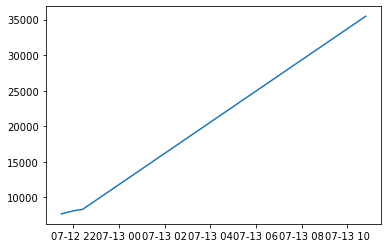

In [126]:
#############################################################
### Fill in this information before running this section ####

#Decide if you want to run this section
run_timing_check = False

#############################################################
#############################################################

old_entries = {
    "Jul 12 2021 7:02PM" : 3696,
    "Jul 12 2021 7:43PM" : 4843,
    "Jul 12 2021 8:27PM" : 16821,
    "Jul 12 2021 8:51PM" : 21158,
    "Jul 12 2021 9:28PM" : 25486
}

entries = {
    "Jul 12 2021 9:29PM" : 'dasgg_TRINITY_GG_110_c20_g1_i3.mrna1',
    "Jul 12 2021 9:59PM" : 's13_TRINITY_DN50407_c9_g1_i1.mrna1',
    "Jul 12 2021 10:08PM" : 's13_TRINITY_DN5591_c0_g1_i1.mrna1',
    "Jul 12 2021 10:13PM" : 'kao_mikado.phaw_50.000081aG112.1.mrna1',
    "Jul 12 2021 10:25PM" : 'st2m_STRG.116.3',
    "Jul 13 2021 10:48AM" : 'das_TRINITY_DN162887_c3_g2_i8.mrna1'
}

total_genes = 3959963

if run_timing_check == True:
    
    times = []
    numbers = []
    
    for key in entries:
        times = times + [datetime.datetime.strptime(key, '%b %d %Y %I:%M%p')]
        transcript_string = entries[key]
        
        old_stdout = sys.stdout
        sys.stdout = mystdout = StringIO()

        !awk '/'{transcript_string}'/{{ print NR; exit }}' mikado_prepared.fasta

        sys.stdout = old_stdout
        linenum = int(mystdout.getvalue().split("\r")[0])
        
        old_stdout = sys.stdout
        sys.stdout = mystdout = StringIO()
        
        !head -n {linenum} mikado_prepared.fasta | grep -c '>'
        
        sys.stdout = old_stdout
        returned = int(mystdout.getvalue().split("\r")[0])
        
        numbers = numbers + [returned]
    
    #calculates total seconds from last to first entry
    time_diff = (times[-1] - times[0]).total_seconds()
    
    #calculates total number of genes output from last to first entry
    number_diff = (numbers[-1] - numbers[0])
    
    #calculates genes per second
    rate = number_diff / time_diff
    display('approximately ' + str(rate) + ' genes per second')
    
    remain_genes = total_genes - numbers[-1]
    
    display('approximately ' + str(remain_genes) + ' genes remain')
    
    remain_time = remain_genes / rate
    finish_time = times[-1] + datetime.timedelta(seconds=remain_time)
    display(remain_time / 60 / 60 / 24)
    display('expected finish at ' + str(finish_time))
    plt.plot(times, numbers)

In [ ]:
#############################################################
### Fill in this information before running this section ####

#Decide if you want to run this section
run_trinotate_prepare = False
run_transdecoder_mikado = True
run_trinotate_blast = False
run_trinotate_hmmscan = False
run_trinotate_signalp = False
run_trinotate_tmhmm = False
run_RNAMMER = False

mikado_loci_fasta = 'DAS.mikado.loci.fasta'
transdecoder_name = mikado_loci_fasta + ".transdecoder.pep"

#############################################################
#############################################################

if run_trinotate_prepare == True:
    #before running this, make sure you have loaded the modules using:
    #module load trinotate perl-dbi
    !/clusterfs/vector/home/groups/software/sl-7.x86_64/modules/trinotate/3.1.1/admin/Build_Trinotate_Boilerplate_SQLite_db.pl Trinotate
    !makeblastdb -in uniprot_sprot.pep -dbtype prot
    !gunzip Pfam-A.hmm.gz
    !hmmpress Pfam-A.hmm

if run_transdecoder_mikado == True:
    #make sure you have loaded transdecoder
    #module load transdecoder
    !TransDecoder.LongOrfs -t $mikado_loci_fasta && TransDecoder.Predict -t $mikado_loci_fasta
    
if run_trinotate_blast == True:
    !blastx -query $mikado_loci_fasta -db uniprot_sprot.pep -num_threads 12 -max_target_seqs 1 -outfmt 6 -evalue 1e-3 > blastx.outfmt6
    !blastp -query $transdecoder_name -db uniprot_sprot.pep -num_threads 12 -max_target_seqs 1 -outfmt 6 -evalue 1e-3 > blastp.outfmt6

if run_trinotate_hmmscan == True:
    !hmmscan --cpu 12 --domtblout TrinotatePFAM.out Pfam-A.hmm $transdecoder_name > pfam.log

if run_trinotate_signalp == True:
    !signalp -f short -n signalp.out $transdecoder_name

if run_trinotate_tmhmm == True:
    !tmhmm --short < transdecoder.pep > tmhmm.out

if run_RNAMMER == True:
    !/clusterfs/vector/home/groups/software/sl-7.x86_64/modules/trinotate/3.1.1/util/rnammer_support/RnammerTranscriptome.pl --transcriptome $mikado_loci_fasta --path_to_rnammer /usr/bin/software/rnammer_v1.2/rnammer
    
